<a href="https://colab.research.google.com/github/NEPatriots-Coder/Colab-Notebooks/blob/main/SurvivalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directory, Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/UdemyDataMining/Data\ Mining\ for\ Business\ in\ Python/1.\ Survival\ Analysis

In [ ]:
#install library
!pip install lifelines

In [10]:
# import library
import pandas as pd

In [12]:
dataset = pd.read_csv("lung.csv")
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [14]:
# data transformation
dataset.loc[dataset.status== 1, "status"] = 0
dataset.loc[dataset.status== 2, "status"] = 1
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


Kaplan Meier Estimator

In [16]:
#KPE
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.time, event_observed = dataset.status)
model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [18]:
#calculate for specific evnets
day_5 = model.event_table.iloc[1,:]
print(day_5)
survived_5 = 1 * (1 - day_5.observed / day_5.at_risk)
print(survived_5)
day_11 = model.event_table.iloc[2,:]
survived_11 = 1 * (1 - day_11.observed / day_11.at_risk)
print(survived_11)

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int64
0.9956140350877193
0.986784140969163


In [20]:
#Approximation
survived_11_approx = (day_11.at_risk - day_11.observed) / day_11.at_risk
print(survived_11_approx)

0.986784140969163


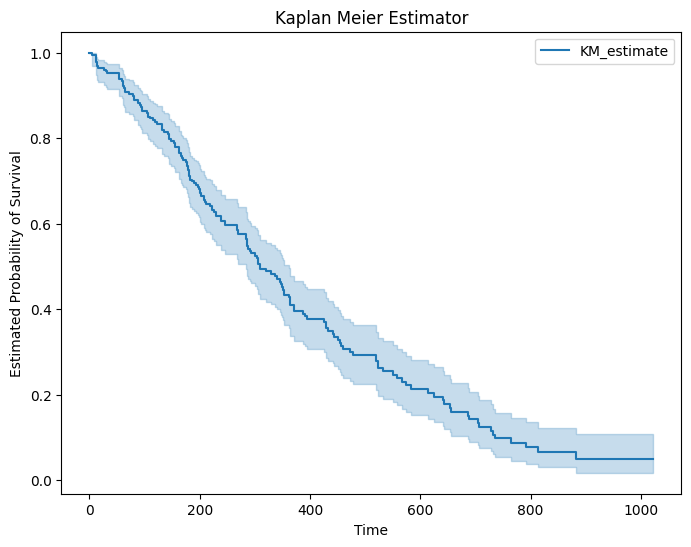

In [31]:
import matplotlib.pyplot as plt

model.plot(figsize=(8,6))
plt.title("Kaplan Meier Estimator")
plt.xlabel("Time")
plt.ylabel("Estimated Probability of Survival")
plt.show()

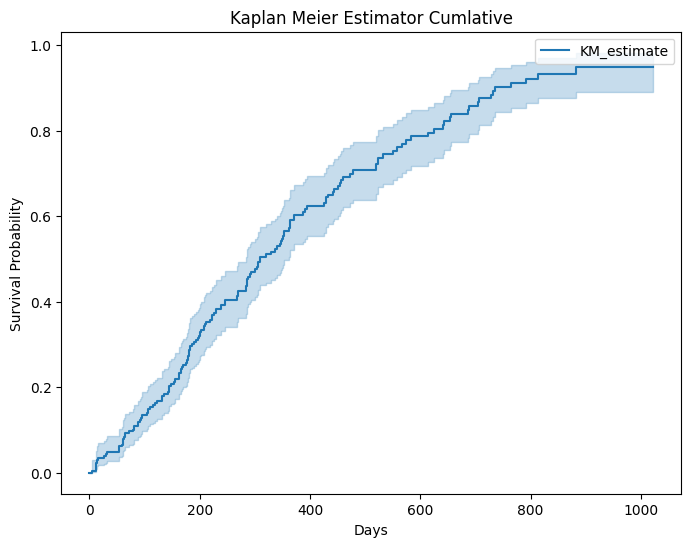

In [32]:
import matplotlib.pyplot as plt

model.plot_cumulative_density(figsize=(8,6))
plt.title("Kaplan Meier Estimator Cumlative")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.show()


##Is there a difference in sex as it relates to survival rate?
###Null Hypothesis: There is no difference between both groups.
###If p-value >0.05 There is no difference between both groups.




Male vs Female

In [34]:
male = dataset[dataset.sex == 1]
female = dataset[dataset.sex == 2]

## Kaplan Meier per Gender

In [35]:
model_males = KaplanMeierFitter()
model_males.fit(durations = male.time,
          event_observed = male.status)
model_females = KaplanMeierFitter()
model_females.fit(durations = female.time,
          event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

## Plotting Survival Curvers per Gender

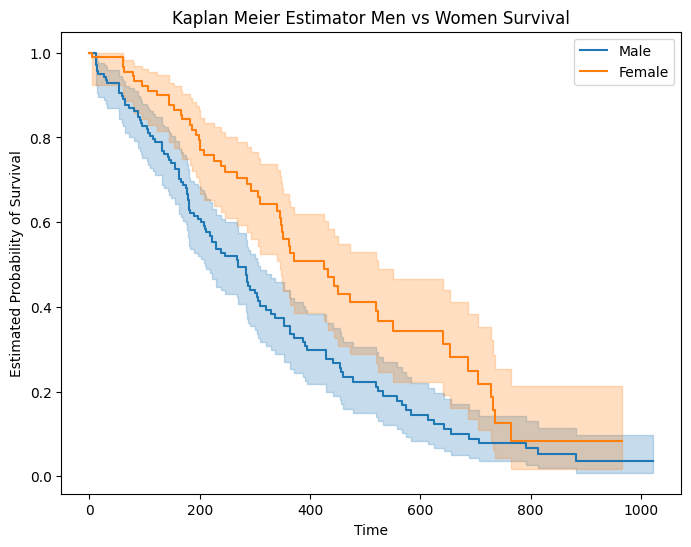

In [40]:
model_males.plot(figsize=(8,6),label='Male')
model_females.plot(label='Female')
plt.title("Kaplan Meier Estimator Men vs Women Survival")
plt.xlabel("Time")
plt.ylabel("Estimated Probability of Survival")
plt.show()

## Log Rank Test

In [46]:
from lifelines.statistics import logrank_test
logrank_test(durations_A = male.time,
             durations_B = female.time,
             evalent_observed_A = male.status,
             event_observed_B = female.status
             )

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
evalent_observed_A = 0      1
1      1
2      0
3      1
4      1
      ..
220    0
222    1
223    0
224    0
226    0
Name: status, Length: 138, dtype: int64
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          20.85 <0.005     17.62